In [27]:
import numpy as np
import pandas as pd
import torch
import os
import matplotlib.pyplot as plt
import torch.nn as nn
from torch.utils.data import DataLoader
from PIL import Image
import torch.nn.functional as F
import torchvision.transforms as transforms
from torchvision.utils import make_grid
from torchvision.datasets import ImageFolder
from torchsummary import summary
from torch.optim import Adam

In [28]:
train_dir = "New Plant Diseases Dataset/New Plant Diseases Dataset/train"
valid_dir = "New Plant Diseases Dataset/New Plant Diseases Dataset/valid"

In [29]:
diseases = os.listdir(train_dir)
print(diseases)

['Apple___Apple_scab', 'Apple___Black_rot', 'Apple___Cedar_apple_rust', 'Apple___healthy', 'Blueberry___healthy', 'Cherry_(including_sour)___healthy', 'Cherry_(including_sour)___Powdery_mildew', 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot', 'Corn_(maize)___Common_rust_', 'Corn_(maize)___healthy', 'Corn_(maize)___Northern_Leaf_Blight', 'Grape___Black_rot', 'Grape___Esca_(Black_Measles)', 'Grape___healthy', 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)', 'Orange___Haunglongbing_(Citrus_greening)', 'Peach___Bacterial_spot', 'Peach___healthy', 'Pepper,_bell___Bacterial_spot', 'Pepper,_bell___healthy', 'Potato___Early_blight', 'Potato___healthy', 'Potato___Late_blight', 'Raspberry___healthy', 'Soybean___healthy', 'Squash___Powdery_mildew', 'Strawberry___healthy', 'Strawberry___Leaf_scorch', 'Tomato___Bacterial_spot', 'Tomato___Early_blight', 'Tomato___healthy', 'Tomato___Late_blight', 'Tomato___Leaf_Mold', 'Tomato___Septoria_leaf_spot', 'Tomato___Spider_mites Two-spotted_spider_mite',

In [30]:
plants = []
NumberOfDiseases = 0
for plant in diseases:
    if plant.split('___')[0] not in plants:
        plants.append(plant.split('___')[0])
    if plant.split('___')[1] != 'healthy':
        NumberOfDiseases += 1

plants

['Apple',
 'Blueberry',
 'Cherry_(including_sour)',
 'Corn_(maize)',
 'Grape',
 'Orange',
 'Peach',
 'Pepper,_bell',
 'Potato',
 'Raspberry',
 'Soybean',
 'Squash',
 'Strawberry',
 'Tomato']

In [31]:
NumberOfDiseases

26

In [32]:
nums = {}
for disease in diseases:
    nums[disease] = len(os.listdir(train_dir + '/' + disease))
class_img_count = pd.DataFrame(nums.values(), index=nums.keys(), columns=["number of images"])
class_img_count

,number of images
Apple___Apple_scab,2016
Apple___Black_rot,1987
Apple___Cedar_apple_rust,1760
Apple___healthy,2008
Blueberry___healthy,1816
Cherry_(including_sour)___healthy,1826
Cherry_(including_sour)___Powdery_mildew,1683
Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot,1642
Corn_(maize)___Common_rust_,1907
Corn_(maize)___healthy,1859


In [33]:
n_train = 0
for value in nums.values():
    n_train += value
print(f"There are {n_train} images for training")

There are 70295 images for training


In [34]:
train_transform = transforms.Compose([
    transforms.Resize((256, 256)),
    transforms.RandomHorizontalFlip(),
    transforms.RandomRotation(10),
    transforms.ToTensor()
])

valid_transform = transforms.Compose([
    transforms.Resize((256, 256)),
    transforms.ToTensor()
])
train = ImageFolder(train_dir, transform=train_transform)
valid = ImageFolder(valid_dir, transform=valid_transform)

In [35]:
img, label = train[0]
print(img.shape, label)

torch.Size([3, 256, 256]) 0


In [36]:
random_seed = 7
torch.manual_seed(random_seed)

In [37]:
batch_size = 64
train_dl = DataLoader(train, batch_size=batch_size, shuffle=True)
valid_dl = DataLoader(valid, batch_size=batch_size)

In [38]:
def conv3x3(in_planes, out_planes, stride=1):
    return nn.Conv2d(in_planes, out_planes, kernel_size=3, stride=stride, padding=1, bias=False)

In [100]:
import torch.nn as nn
import torch.nn.functional as F

class BasicBlock(nn.Module):
    def __init__(self, in_channels, out_channels, stride=1, downsample=None):
        super(BasicBlock, self).__init__()
        self.conv1 = nn.Conv2d(in_channels, out_channels, kernel_size=3, stride=stride, padding=1)
        self.bn1 = nn.BatchNorm2d(out_channels)
        self.relu = nn.ReLU(inplace=False)
        self.downsample = downsample

    def forward(self, x):
        identity = x

        out = self.conv1(x)
        out = self.bn1(out)
        out = self.relu(out)
        if self.downsample is not None:
            identity = self.downsample(x)

        out = out + identity
        out = self.relu(out)

        return out


In [101]:
import torch
import torch.nn as nn

class resnet(nn.Module):
    def __init__(self, in_channels, num_classes):
        super(resnet, self).__init__()
        self.conv1 = nn.Conv2d(in_channels, 64, kernel_size=7, stride=2, padding=3, bias=False)
        self.bn1 = nn.BatchNorm2d(64)
        self.relu = nn.ReLU(inplace=False)
        self.maxpool = nn.MaxPool2d(kernel_size=3, stride=2, padding=1)

        self.layer1 = self._make_layer(64, 64, stride=1)

        # Determine the size of the output features from the last convolutional layer
        self._to_linear = None
        self._initialize_to_linear(in_channels)

        self.fc = nn.Linear(self._to_linear, num_classes)

    def _make_layer(self, in_channels, out_channels, stride=1):
        downsample = None
        if stride != 1 or in_channels != out_channels:
            downsample = nn.Sequential(
                nn.Conv2d(in_channels, out_channels, kernel_size=1, stride=stride, bias=False),
                nn.BatchNorm2d(out_channels),
            )
        return BasicBlock(in_channels, out_channels, stride, downsample)

    def _initialize_to_linear(self, in_channels):
        """Calculate the size of the flattened output from the last conv layer."""
        with torch.no_grad():
            x = torch.randn(1, in_channels, 256, 256)  # Dummy input
            x = self.conv1(x)
            x = self.bn1(x)
            x = self.relu(x)
            x = self.maxpool(x)
            x = self.layer1(x)
            x = torch.flatten(x, 1)
            self._to_linear = x.shape[1]

    def forward(self, x):
        x = self.conv1(x)
        x = self.bn1(x)
        x = self.relu(x)
        x = self.maxpool(x)
        x = self.layer1(x)
        x = torch.flatten(x, start_dim=1)
        x = self.fc(x)
        return x
    def training_step(self, batch):
        images, labels = batch
        out = self(images)
        loss = F.cross_entropy(out, labels)
        return loss
     
    def validation_step(self, batch):
        images, labels = batch
        out = self(images)
        loss = F.cross_entropy(out, labels)
        acc = accuracy(out, labels)
        return {"val_loss": loss.detach(), "val_accuracy": acc}
    
    def validation_epoch_end(self, outputs):
        batch_losses = [x["val_loss"] for x in outputs]
        batch_accs = [x["val_accuracy"] for x in outputs]
        epoch_loss = torch.stack(batch_losses).mean()
        epoch_acc = torch.stack(batch_accs).mean()
        return {"val_loss": epoch_loss, "val_accuracy": epoch_acc}

    def epoch_end(self, epoch, result):
        print(f"Epoch [{epoch}], train_loss: {result['train_loss']:.4f}, val_loss: {result['val_loss']:.4f}, val_acc: {result['val_accuracy']:.4f}")

In [102]:
def accuracy(outputs, labels):
    _, preds = torch.max(outputs, dim=1)
    return torch.tensor(torch.sum(preds == labels).item() / len(preds))

In [103]:
def fit(epochs, lr, model, train_loader, val_loader, opt_func=torch.optim.Adam):
    history = []
    optimizer = opt_func(model.parameters(), lr)
    for epoch in range(epochs):
        # Training Phase 
        model.train()
        train_losses = []
        for batch in train_loader:
            loss = model.training_step(batch)
            train_losses.append(loss)
            loss.backward()
            optimizer.step()
            optimizer.zero_grad()
        
        # Validation phase
        result = evaluate(model, val_loader)
        result['train_loss'] = torch.stack(train_losses).mean().item()
        model.epoch_end(epoch, result)
        history.append(result)
    return history

In [104]:
def evaluate(model, val_loader):
    model.eval()
    outputs = [model.validation_step(batch) for batch in val_loader]
    return model.validation_epoch_end(outputs)

In [105]:
model = resnet(in_channels=3, num_classes=38)

In [106]:
summary(model, (3, 256, 256))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1         [-1, 64, 128, 128]           9,408
       BatchNorm2d-2         [-1, 64, 128, 128]             128
              ReLU-3         [-1, 64, 128, 128]               0
         MaxPool2d-4           [-1, 64, 64, 64]               0
            Conv2d-5           [-1, 64, 64, 64]          36,928
       BatchNorm2d-6           [-1, 64, 64, 64]             128
              ReLU-7           [-1, 64, 64, 64]               0
              ReLU-8           [-1, 64, 64, 64]               0
        BasicBlock-9           [-1, 64, 64, 64]               0
           Linear-10                   [-1, 38]       9,961,510
Total params: 10,008,102
Trainable params: 10,008,102
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.75
Forward/backward pass size (MB): 36.00
Params size (MB): 38.18
Est

In [110]:
epochs = 5
lr = 0.001

In [111]:
%%time

# Enable anomaly detection
torch.autograd.set_detect_anomaly(True)

history = fit(epochs, lr, model, train_dl, valid_dl)

Epoch [0], train_loss: 3.8495, val_loss: 1.4703, val_acc: 0.8691
Epoch [1], train_loss: 1.2950, val_loss: 1.7016, val_acc: 0.8203
Epoch [2], train_loss: 0.7628, val_loss: 4.5646, val_acc: 0.6377
Epoch [3], train_loss: 0.6014, val_loss: 1.7200, val_acc: 0.7798
Epoch [4], train_loss: 0.4728, val_loss: 1.2474, val_acc: 0.8209
Wall time: 13h 32min 41s


In [112]:
torch.save(model.state_dict(), "plant_disease_model.pth")

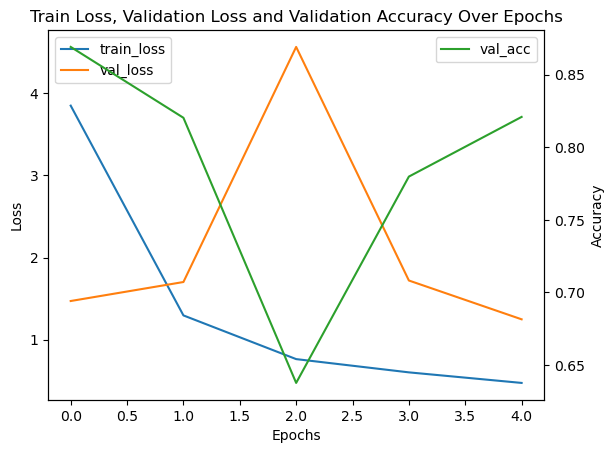

In [117]:
ax1.plot(epochs, train_loss, label='train_loss', color='tab:blue')
ax1.plot(epochs, val_loss, label='val_loss', color='tab:orange')
ax1.set_xlabel('Epochs')
ax1.set_ylabel('Loss')
ax1.legend(loc='upper left')

ax2 = ax1.twinx()
ax2.plot(epochs, val_acc, label='val_acc', color='tab:green')
ax2.set_ylabel('Accuracy')
ax2.legend(loc='upper right')

plt.title('Train Loss, Validation Loss and Validation Accuracy Over Epochs')
plt.show()
